# **Problem Formulation**  
**Vonny Yudianto | 25741719 | 36103 - Statistical Thinking for Data Science Assignment Task 1**


Recently, a telecommunications company launched a marketing campaign aimed at promoting the adoption of a new subscription package among its customers. The challenge the company faced was determining which customers were most likely to subscribe. The problem was that not all customers responded to the campaign. This could be due to incomplete or inaccurate data. The dataset used was TeleCom_Data_1.CSV, which contains:  

- age =	Age
- job =	Type of job
- marital =	Marital status
- education =	Level of education
- default =	Has credit in default
- balance =	Average yearly balance
- housing =	Has a housing loan
- loan =	Has a personal loan
- contact =	Contact communication type
- day =	Day of contact
- month =	Month of contact
- duration =	Last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
- campaign =	Number of contacts performed during this campaign and for this client
- pdays =	Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous =	Number of contacts performed before this campaign and for this client
- poutcome =	Outcome of the previous marketing campaign
- emp.var.rate =	employment variation rate - quarterly indicator (numeric)
- cons.price.idx =	consumer price index - monthly indicator (numeric)    
- cons.conf.idx =	consumer confidence index - monthly indicator (numeric)
- euribor3m =	euribor 3 month rate - daily indicator (numeric)
- nr.employed	= number employed - quarterly indicator (numeric)
- y =	Did the client subscribe to a Telecom plan ?  

**Research Question :**  
1.	What characteristics of customers are more likely to subscribe to a new package ?
2.	What factors most influence customer decisions ?
3.	Are there specific customer segments that show the highest response ?  

**Hypothesis :**
-	H0	: There is no significant relationship between customer characteristics, economic factors, or specific segments and customers' decisions to subscribe to new packages.
-	H1	: There is a significant relationship between customer characteristics, economic factors, or certain segments with the customer's decision to subscribe to a new package.  

Based on the dataset above, the variable ‘y’ which is the subscription decision will be the target variable in this case.



# **Data Preprocessing**


In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy.stats import chi2_contingency
from google.colab import drive
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

The code above is a library that is commonly used when wanting to do exploratory data analysis.

In [ ]:
# Mount Drive
drive.mount('/content/drive')

# Read raw CSV directly from the correct path
with open('/content/drive/MyDrive/36103_StatisticalThinkingforDataScience/Assignment_1_STDS/TeleCom_Data_1.csv','r') as f:
    lines = f.readlines()

# Split header and remove double quotes
columns = [col.replace('"', '') for col in lines[0].strip().split(';')]

# Split data per line and remove double quotes
data = [[cell.replace('"', '') for cell in line.strip().split(';')] for line in lines[1:]]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Check the first 5 columns and rows
print(df.columns)
df.head()

Mounted at /content/drive
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


I built code to connect Google Colab with Google Drive so that the dataset can be accessed directly, eliminating the need to upload data repeatedly every time I want to run a task. Next, because the dataset format used has special characters, I added code to remove double quotes (") and separate columns using the delimiter ;. After that, I displayed the first 5 rows of the dataset to ensure that the data was successfully read correctly.

In [ ]:
# Displaying the Bottom 5 Data
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41175,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41176,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41177,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41178,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41179,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Here are the bottom 5 rows of data from the dataset

In [ ]:
# Displaying the column data that we have
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

The results above show the column titles in the dataset owned

In [ ]:
print(f'The number of rows and columns in the dataset df is {df.shape}')
df.info()

The number of rows and columns in the dataset df is (41180, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41180 non-null  object
 1   job             41180 non-null  object
 2   marital         41180 non-null  object
 3   education       41180 non-null  object
 4   default         41180 non-null  object
 5   housing         41180 non-null  object
 6   loan            41180 non-null  object
 7   contact         41180 non-null  object
 8   month           41180 non-null  object
 9   day_of_week     41180 non-null  object
 10  duration        41180 non-null  object
 11  campaign        41180 non-null  object
 12  pdays           41180 non-null  object
 13  previous        41180 non-null  object
 14  poutcome        41180 non-null  object
 15  emp.var.rate    41180 non-null  object
 16  cons.price.idx  41180 non-null

The code above is used to display dataset dimensions and data structure information. However, the results are very abnormal, as all columns are currently read as object data types. Therefore, data formatting is necessary.

In [ ]:
# Numeric columns that should be converted to float/int type
numeric_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

# Convert numeric columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' will change the invalid value to NaN

# Target column 'y' change to category (binary)
df['y'] = df['y'].map({'yes':1, 'no':0})

# Categorical columns
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check dataset info after formatting
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41180 non-null  int64   
 1   job             41180 non-null  category
 2   marital         41180 non-null  category
 3   education       41180 non-null  category
 4   default         41180 non-null  category
 5   housing         41180 non-null  category
 6   loan            41180 non-null  category
 7   contact         41180 non-null  category
 8   month           41180 non-null  category
 9   day_of_week     41180 non-null  category
 10  duration        41180 non-null  int64   
 11  campaign        41180 non-null  int64   
 12  pdays           41180 non-null  int64   
 13  previous        41180 non-null  int64   
 14  poutcome        41180 non-null  category
 15  emp.var.rate    41180 non-null  float64 
 16  cons.price.idx  41180 non-null  float64 
 17  cons.conf.id

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


After formatting the data, we can see that the dataset consists of 41,180 rows and 21 columns. Of the total columns:  
- 6 columns are integer: age, duration, campaign, pdays, previous, and y
- 5 columns are float: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed
- 10 columns are categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, and poutcome  
This data type division makes it easier to conduct exploratory analysis and ensures that each column is handled according to its characteristics, both numeric and categorical.

In [ ]:
# Select a numeric column
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Look at the first 5 lines
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


The following is an example of numerical data

In [ ]:
# Select categorical columns
df_categorical = df.select_dtypes(include=['category', 'object'])

# Look at the first 5 lines
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
2,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent
3,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
4,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent


The following is an example of categorical data

In [ ]:
# View the amount of missing data in the dataset
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


This code displays NaN or Null data and the result is that there are no missing values, we need to check in another way.

In [ ]:
# Create a summary per column
listItem = []
for col in df.columns:
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        df[col].drop_duplicates().sample(2, random_state=42).tolist()
    ])

# Insert into summary dataframe
dfDesc = pd.DataFrame(
    listItem,
    columns=['Feature', 'DataType', 'MissingValues', 'UniqueValues', 'SampleUnique']
)

print("the size of the dataset:", df.shape)
dfDesc

the size of the dataset: (41180, 21)


,Feature,DataType,MissingValues,UniqueValues,SampleUnique
0,age,int64,0,78,"[36, 40]"
1,job,category,0,12,"[entrepreneur, unknown]"
2,marital,category,0,4,"[single, unknown]"
3,education,category,0,8,"[high.school, basic.4y]"
4,default,category,0,3,"[no, unknown]"
5,housing,category,0,3,"[no, yes]"
6,loan,category,0,3,"[no, yes]"
7,contact,category,0,2,"[cellular, telephone]"
8,month,category,0,10,"[apr, jun]"
9,day_of_week,category,0,5,"[tue, fri]"


In [ ]:
# Checking 'unknown' data
(df == "unknown").sum()

,0
age,0
job,330
marital,80
education,1731
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
for col in df.columns:
    print(col, df[col].unique()[:10])

age [40 56 45 59 41 24 25 29 57 35]
job ['admin.', 'services', 'blue-collar', 'technician', 'housemaid', 'retired', 'management', 'unemployed', 'self-employed', 'unknown']
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']
marital ['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']
education ['basic.6y', 'high.school', 'basic.9y', 'professional.course', 'unknown', 'basic.4y', 'university.degree', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
                         'professional.course', 'university.degree', 'unknown']
default ['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']
housing ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']
loan ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']
c

Found 'unknown' category values, which act as missing values. These will not be removed because they are quite numerous. Since this task focuses on Exploratory Data Analysis (EDA), the 'unknown' values in categorical columns will be retained without modification. These unique values can be analyzed as a separate segment, which is safer than attempting to impute or guess their values.

In [ ]:
# Checking duplicate data
df.duplicated().sum()

np.int64(12)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

The inspection revealed several rows of duplicate data. Due to their relatively small number, these duplicate rows will be removed to maintain the integrity of the dataset.

# **Exploratory Data Analysis (EDA)**

## **Explore the Target Variable**

/tmp/ipython-input-348604405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette="Set2")


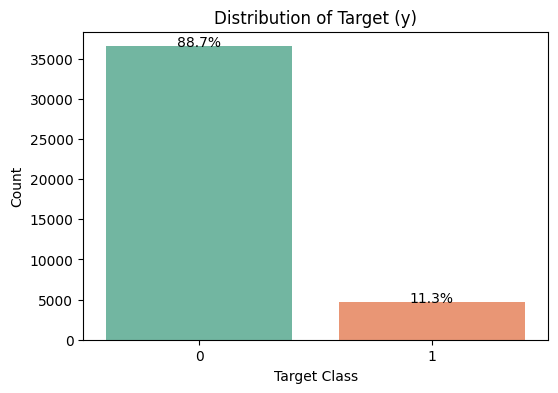

In [ ]:
# Target distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='y', data=df, palette="Set2")

# Add percentage above bar
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            '{:1.1f}%'.format(height/total*100),
            ha="center")

plt.title('Distribution of Target (y)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [ ]:
df['y'].value_counts()

,count
y,
0,36531
1,4637


In [ ]:
df['y'].astype('category').describe()

,y
count,41168
unique,2
top,0
freq,36531


The distribution of the target variable y was analyzed to understand the proportion of customers who subscribed to the new package (1) and those who did not subscribe (0). Based on the value_counts() results, the majority of customers did not subscribe, namely 36,531 out of a total of 41,168 data points (approximately 88.7%), while only 4,637 customers (approximately 11.3%) subscribed. Visualization using a bar chart clearly shows this difference, with the green bar representing class 0 (not subscribed) and the orange bar representing class 1 (subscribed).  

From the statistical description of the categories, it can be seen that the target variable has two unique classes, with the majority class being 0. This indicates significant **imbalanced class**. This class imbalance is important to note because it can affect the results of data analysis and interpretation. Predictive models built on this dataset tend to be biased toward the majority class, thus possibly over-predicting unsubscribed customers and under-predicting actual subscribed customers. Therefore, in the next stage of analysis, special attention needs to be paid to the class distribution, for example by considering the sampling method, threshold adjustment, or using evaluation metrics that are sensitive to class imbalance, such as F1-score, precision-recall, or area under the ROC curve.

## **Explore the Numeric Variable**

In [ ]:
# Numerical Data Statistics
df_numeric = df.select_dtypes(include=['int64', 'float64'])
print("=== Numerical Data Statistics ===\n")
display(df_numeric.describe().T)

=== Numerical Data Statistics ===



,count,mean,std,min,25%,50%,75%,max
age,41168.0,40.021449,10.419022,17.000,32.000,38.000,47.000,98.000
duration,41168.0,258.311237,259.325938,0.000,102.000,180.000,319.000,4918.000
campaign,41168.0,2.568087,2.770530,1.000,1.000,2.000,3.000,56.000
pdays,41168.0,962.506073,186.835214,0.000,999.000,999.000,999.000,999.000
previous,41168.0,0.172756,0.493782,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41168.0,0.081937,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41168.0,93.575563,0.578761,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41168.0,-40.502261,4.627020,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41168.0,3.621425,1.734375,0.634,1.344,4.857,4.961,5.045
nr.employed,41168.0,5167.052308,72.230165,4963.600,5099.100,5191.000,5228.100,5228.100


The results of statistical exploration of the numeric variables provide a comprehensive overview of the characteristics of the quantitative data. The dataset has 41,168 entries for each numeric variable. The age variable indicates that the majority of customers are aged between 32 and 47, with a median of 40 years, with the youngest customer being 17 and the oldest being 98.  

The duration of the last contact or duration variable averages 258 seconds, but there are extreme values ​​of up to 4,918 seconds, indicating an outlier. This is consistent with the wide distribution at a standard deviation of 259 seconds. The campaign variable, which indicates the number of contacts during the current campaign, averages 2.5 times per customer, with a maximum of 56 times, indicating some customers are contacted very frequently.  

The pdays and previous variables provide information from previous campaigns. The majority of pdays values ​​are around 999, indicating customers have not been contacted previously, while previous indicates that most customers have not been contacted previously with the median is 0.  

Macroeconomic variables such as emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed show relatively stable average values, with moderately extreme ranges, except for a few outliers in emp.var.rate and euribor3m.  

Overall, this statistical analysis reveals significant variation in several numerical variables, noteworthy outliers (e.g., duration and campaign), and an unbalanced target distribution, which are important to consider in further analysis and predictive model development.

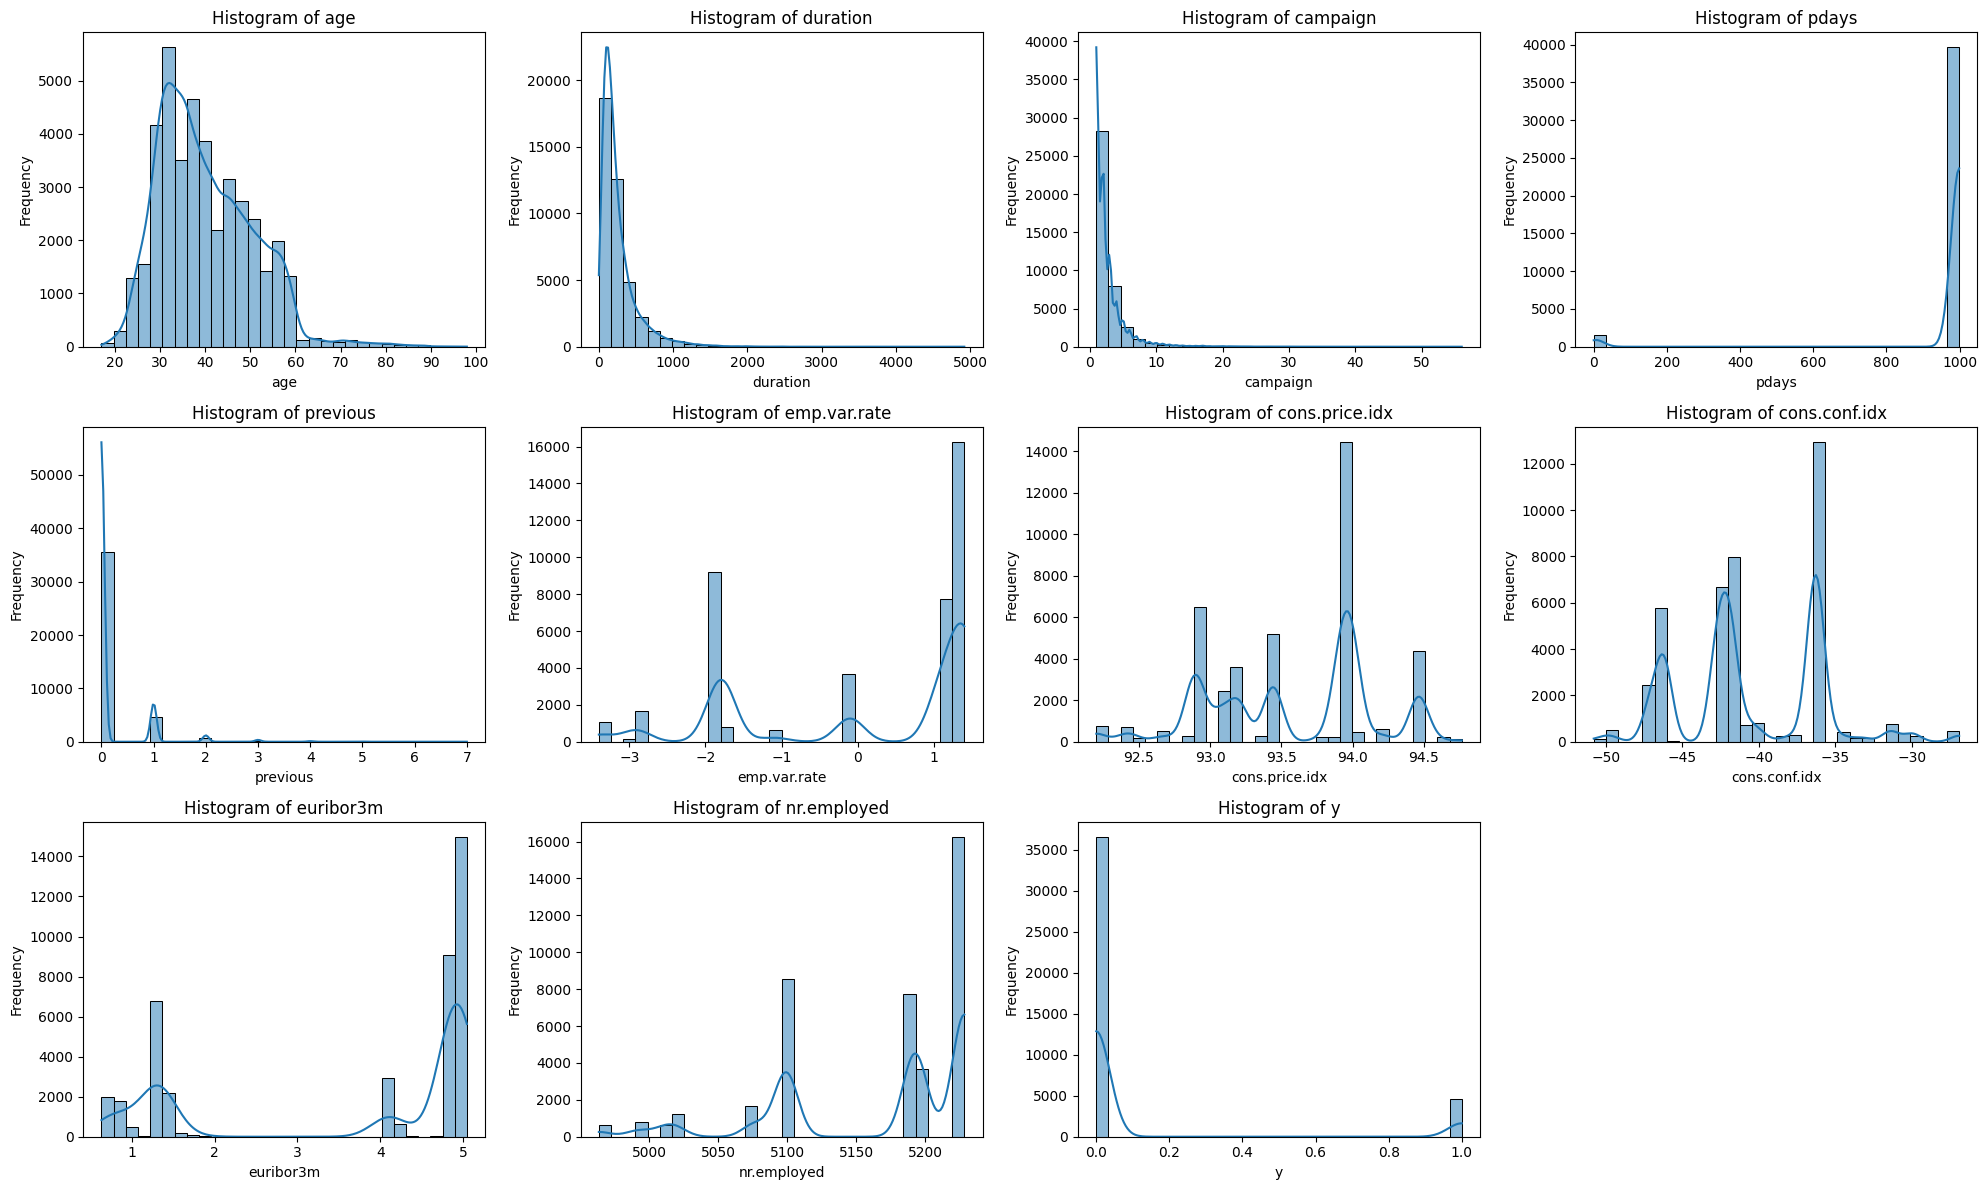

In [ ]:
# Retrieve all numeric columns from dataframe
numerical_vars = df_numeric.select_dtypes(include=['int64', 'float64']).columns

# Make a figure with a grid
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

# Loop each numeric variable
for i, var in enumerate(numerical_vars):
    sns.histplot(df_numeric[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# If there are fewer variables than grid slots, leave the rest blank
for j in range(len(numerical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The coding results above are statistical explorations using distribution graphs for numeric variables. The age histogram shows a nearly normal distribution, with most individuals in the 30–50 age range, indicating a concentration of productive adults. The duration histogram shows a distribution strongly skewed to the right, meaning that most conversations or interactions are relatively short, but there are a few very long ones.  

For campaign and previous, the distribution is strongly skewed to the left with mostly low values, indicating that the majority of individuals have only engaged in a few previous campaigns or interactions. A similar trend is observed for pdays, which shows very high values ​​near 999, likely representing individuals who have never been contacted before or certain default values.  

The emp.var.rate histogram shows several peaks (multimodal), indicating variations in the levels of economic variables across different conditions. Meanwhile, for cons.price.idx and cons.conf.idx, the distributions also show several clear peaks, indicating that most of the data falls within certain price ranges and consumer confidence levels, with prominent frequencies at certain values.  

The histogram of the euribor3m variable shows data concentrated at certain points, specifically around values ​​1, 4, and 5. This distribution is uneven and indicates multimodality, meaning there are several frequency peaks indicating that certain value groups occur more frequently.  

The histogram of the nr.employed variable shows a similar distribution to the histogram of the euribor3m variable, with most of the data concentrated at certain values. The nr.employed variable shows a distribution around 5100 and 5225. This indicates that the number of employees recorded in the dataset tends to be stable at certain values ​​and is rarely evenly distributed.  

The histogram of the y variable, the target variable, shows a highly imbalanced distribution. The majority of the data falls at 0, while only a few fall at 1. This indicates class imbalance, where class 0 is significantly more prevalent than class 1, which is important to consider when building predictive models.  

Overall, this distribution demonstrates the characteristics of a heterogeneous dataset, with some numeric variables exhibiting a normal distribution, but most others exhibiting skewness or a multimodal pattern.

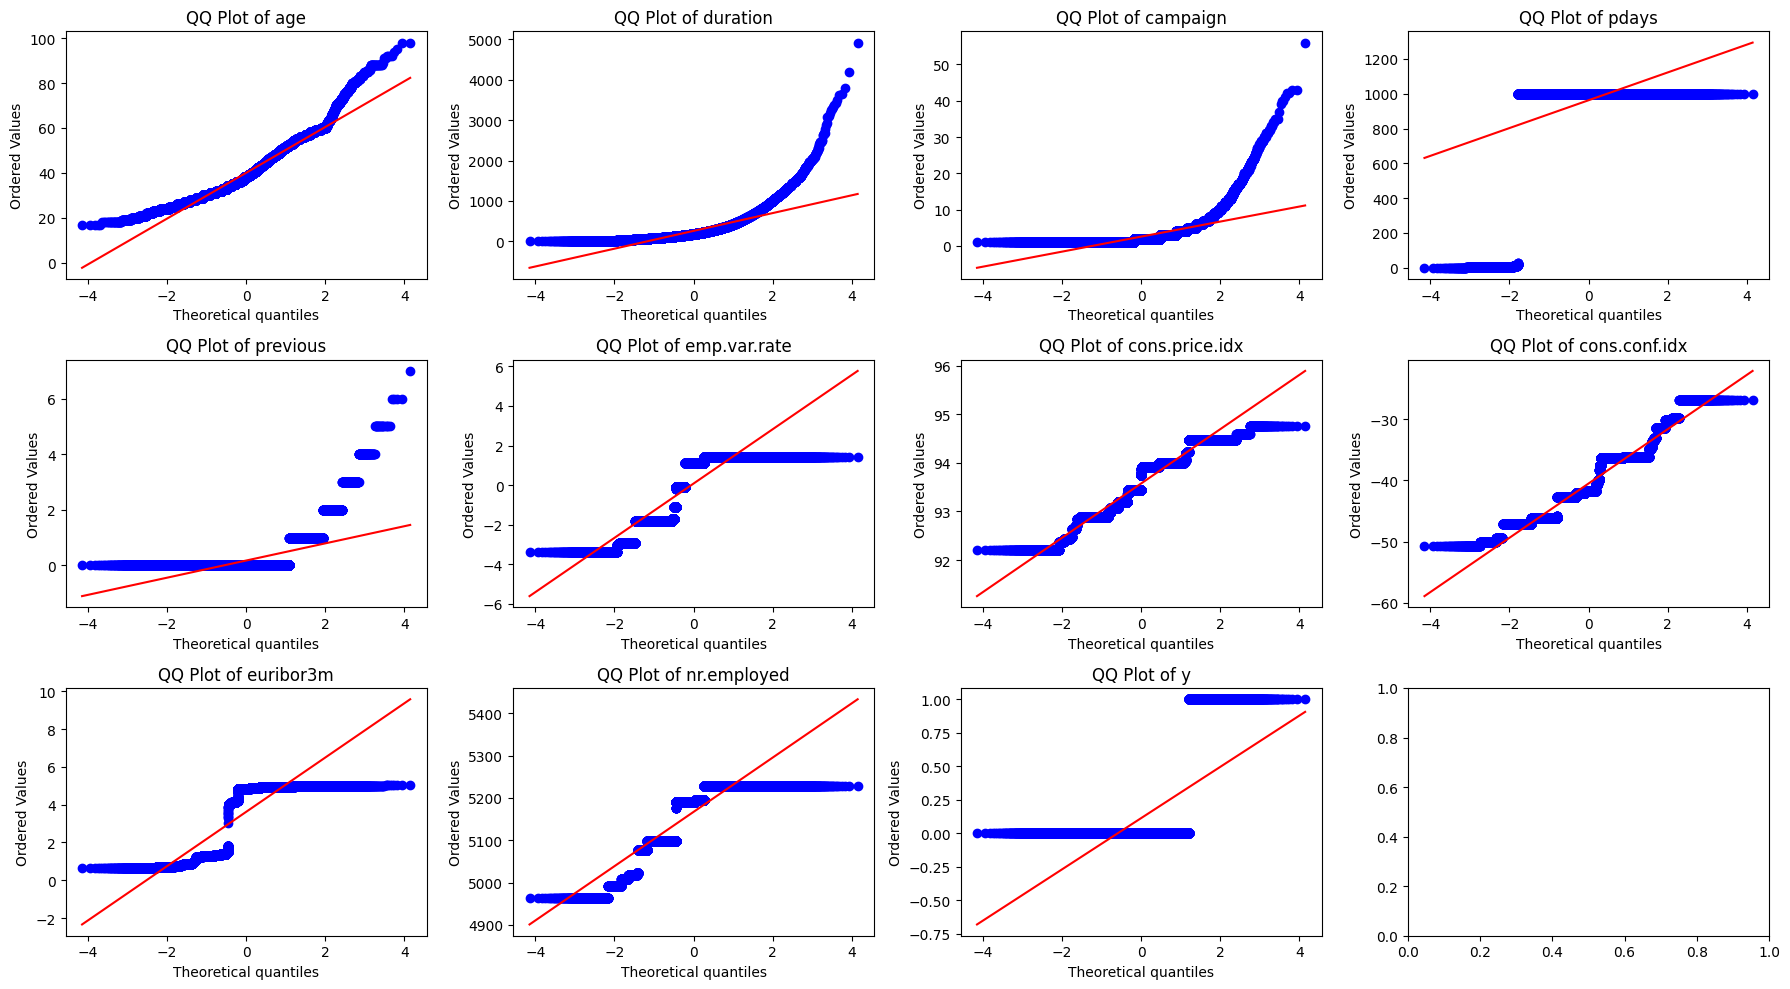

In [ ]:
# QQ Plot for all numerical variables
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(df_numeric.columns):
    stats.probplot(df_numeric[var].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'QQ Plot of {var}')

plt.tight_layout()
plt.show()

Based on the QQ Plot results above, it can be seen that most of the predictor variables in the dataset do not follow a normal distribution. Numeric variables such as age, duration, and campaign show a clear deviation from the diagonal line, especially in the right tail, indicating a right-skewed distribution. This means that most values ​​fall in the low to mid-range, while there are a small number of observations with very high values. Meanwhile, variables such as pdays and previous display a sharply graded pattern, reflecting the discrete nature of the data with a predominance of certain values, further deviating from the assumption of normality.  

Several macroeconomic variables, such as cons.price.idx and cons.conf.idx, are relatively closer to the diagonal line, although they still show slight deviations due to the limited nature of the data. Other variables, such as euribor3m and nr.employed, also appear to be non-normally distributed, as their distributions tend to be centered around certain values. Thus, it can be concluded that almost all input variables do not meet the normality assumption typically required in normal distribution-based statistical models.  

The target variable y has a very different QQ plot pattern, with points at only two levels (0 and 1). This indicates that y is a binary variable, so it is natural that it does not follow a normal distribution.  

Therefore, the suggested approach for modeling is a classification method, such as Logistic Regression, Random Forest, or XGBoost, rather than conventional linear regression. The fact that most predictors are non-normal also indicates that decision tree-based algorithms are more flexible, as they do not require a normal distribution in the input data.

In [ ]:
#  Correlation Testing
CorrelationDataNumeric = df[['age',	'duration',	'campaign',	'pdays',
                             'previous',	'emp.var.rate',	'cons.price.idx',
                             'cons.conf.idx',	'euribor3m',	'nr.employed',	'y']].corr()
CorrelationDataNumeric

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000788,0.004693,-0.034170,0.023738,-0.000203,0.000670,0.129356,0.010988,-0.017276,0.030306
duration,-0.000788,1.000000,-0.071766,-0.047483,0.020642,-0.027924,0.005262,-0.008076,-0.032830,-0.044627,0.405328
campaign,0.004693,-0.071766,1.000000,0.052556,-0.079197,0.150817,0.127939,-0.013656,0.135199,0.144150,-0.066343
pdays,-0.034170,-0.047483,0.052556,1.000000,-0.587705,0.271057,0.079469,-0.092009,0.296805,0.372362,-0.324512
previous,0.023738,0.020642,-0.079197,-0.587705,1.000000,-0.421214,-0.204871,-0.049801,-0.454910,-0.501279,0.229972
emp.var.rate,-0.000203,-0.027924,0.150817,0.271057,-0.421214,1.000000,0.775615,0.196103,0.972266,0.907121,-0.298251
cons.price.idx,0.000670,0.005262,0.127939,0.079469,-0.204871,0.775615,1.000000,0.059583,0.688679,0.522810,-0.136413
cons.conf.idx,0.129356,-0.008076,-0.013656,-0.092009,-0.049801,0.196103,0.059583,1.000000,0.277594,0.100109,0.055124
euribor3m,0.010988,-0.032830,0.135199,0.296805,-0.454910,0.972266,0.688679,0.277594,1.000000,0.945209,-0.307641
nr.employed,-0.017276,-0.044627,0.144150,0.372362,-0.501279,0.907121,0.522810,0.100109,0.945209,1.000000,-0.354532


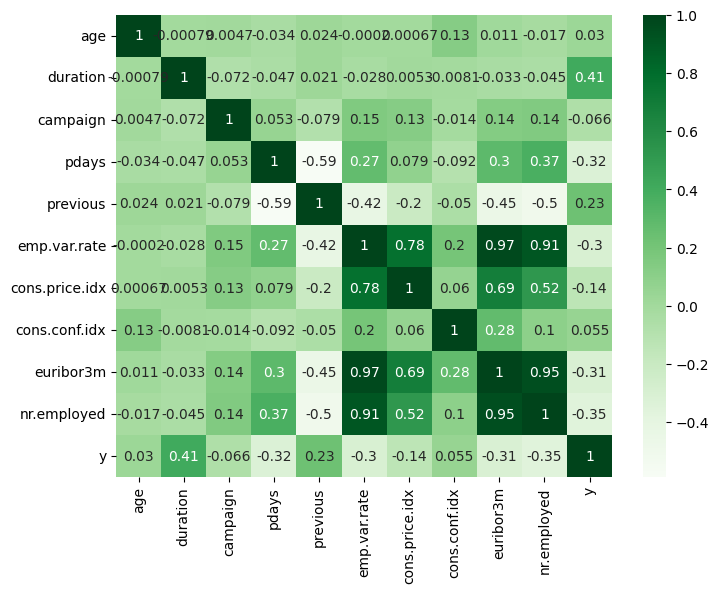

In [ ]:
# Displaying Correlation Test Results using Heatmap from Seaborn
plt.figure(figsize = (8,6))
sns.heatmap(CorrelationDataNumeric, annot=True, cmap='Greens')
plt.show()

The correlation analysis results above between the numeric variables reveal several interesting relationships. The target variable, y, has the highest positive correlation with duration, at 0.41, indicating that the longer the duration of contact during the campaign, the more likely customers are to subscribe to a new package. The previous variable, which indicates the number of previous contacts, also has a moderate positive correlation with y, at 0.23, indicating that customers who have been contacted previously tend to be more responsive.  

Conversely, the variables pdays, emp.var.rate, euribor3m, and nr.employed show negative correlations with y, at -0.32, -0.30, -0.31, and -0.35, respectively. This indicates that certain economic conditions and the time since the last contact can negatively influence customer response to the campaign. Other variables, such as age, campaign, cons.price.idx, and cons.conf.idx, show relatively low correlations with target, so their influence on customer decisions is likely minimal.  

Furthermore, several numeric variables exhibited a very strong correlation with each other, for example, euribor3m and emp.var.rate, with a value of 0.97. Furthermore, the relationship between nr.employed and emp.var.rate was marked with a value of 0.91. Furthermore, the variables cons.price.idx and emp.var.rate showed a correlation with a value of 0.78. These values ​​indicate potential multicollinearity in the macroeconomic data. This should be taken into account when developing predictive models to avoid information redundancy.  

Overall, these correlations confirm that contact duration and previous interactions are key factors in determining customer response, while macroeconomic variables and several other features provide additional signals that can be considered in segmentation and campaign strategies.

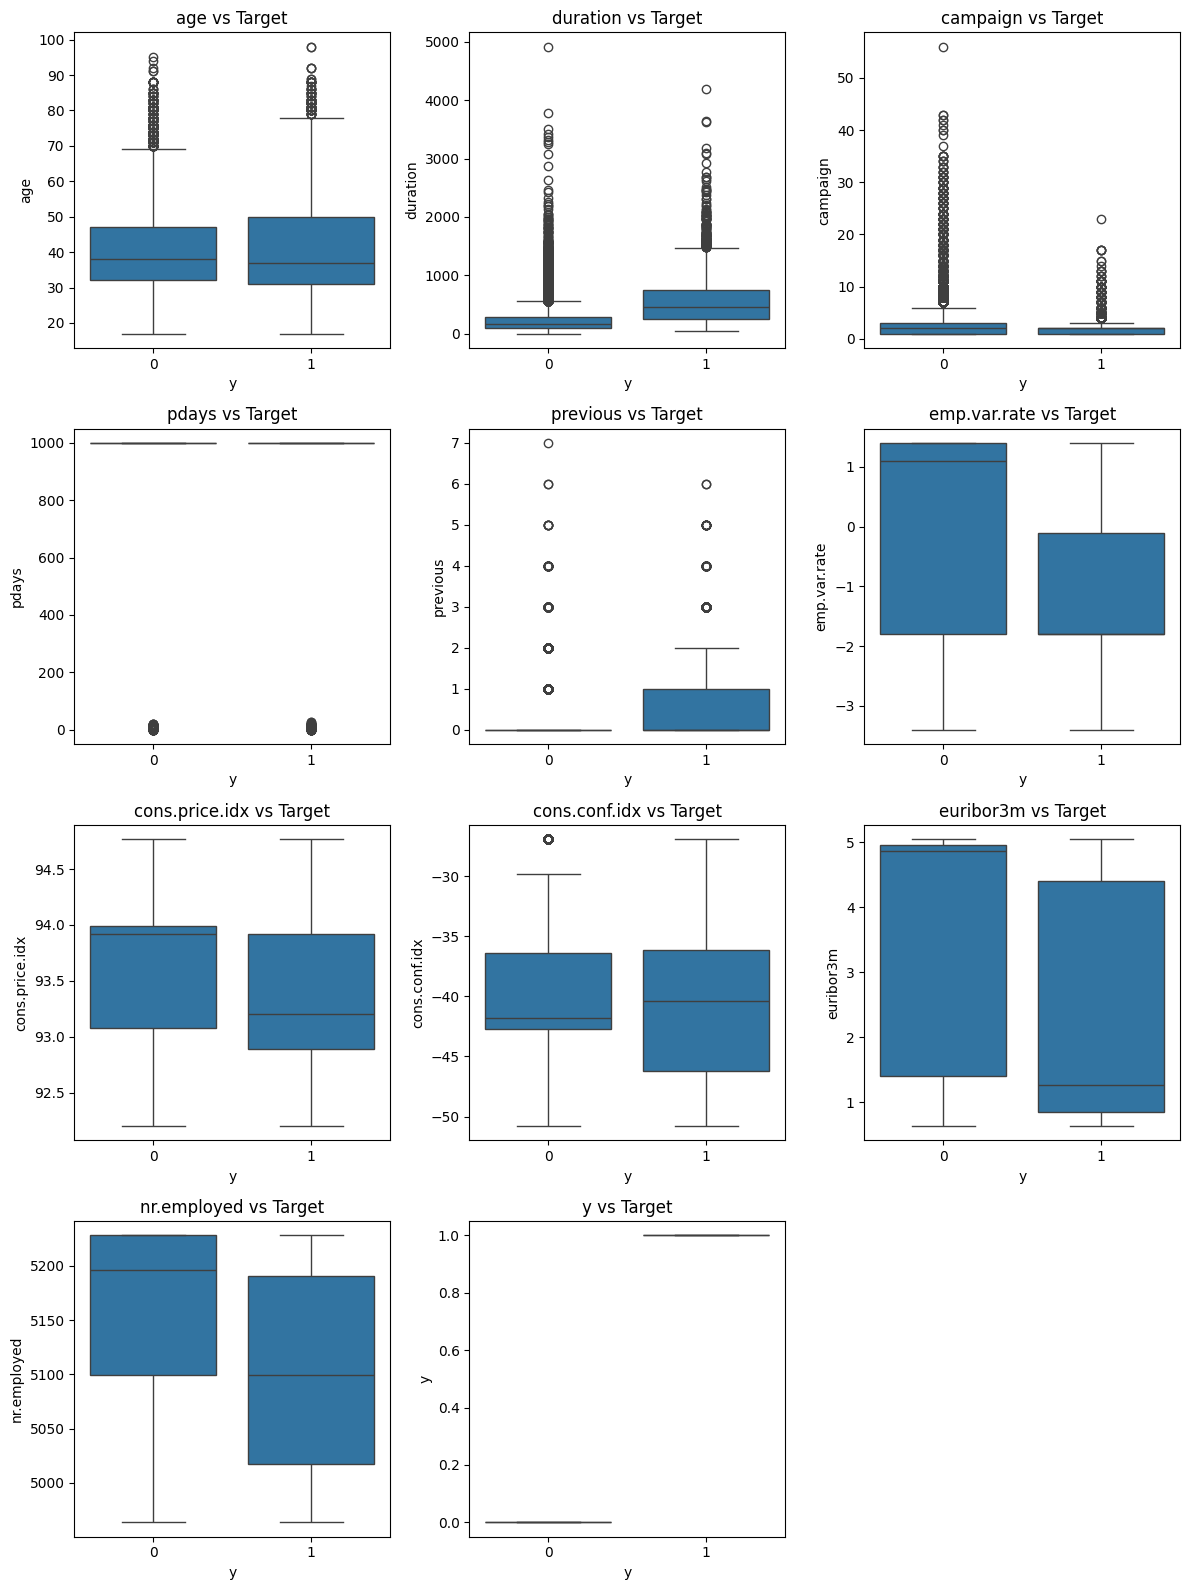

In [ ]:
# Looking at the distribution of numerical variables against the categorical target variable (y)
cols = df_numeric.columns
n_cols = 3
n_rows = (len(cols)+n_cols-1)//n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

for i, col in enumerate(cols):
    ax = axes[i//n_cols, i%n_cols]
    sns.boxplot(x='y', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs Target')

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Based on the boxplot visualization above, between the predictor and target variables, it appears that call duration is the variable that most differentiates between subscribed and non-subscribed customers. The median call duration for subscribed customers is significantly higher, indicating that the longer the interaction with a potential customer, the greater the likelihood of conversion. The previous variable also shows an interesting pattern, with the subscribed group having a slightly higher history of previous contact than the non-subscribed group.  

Meanwhile, macroeconomic variables such as emp.var.rate and cons.conf.idx also show differences in distribution between the two classes. Subscribed customers tend to emerge during less favorable economic conditions, as indicated by lower emp.var.rate values ​​and more pessimistic cons.conf.idx values. This suggests that external factors such as economic conditions can influence customers' tendency to respond to marketing campaigns.  

On the other hand, several variables such as age, campaign, pdays, and cons.price.idx do not show significant differences in distribution between the two classes. For example, the majority of customers are in the same age range, and the number of campaigns conducted is relatively similar for both subscribed and non-subscribed customers. Thus, these variables may have a smaller contribution to target differentiation than duration and macroeconomic factors.  

Furthermore, the euribor3m variable shows a fairly clear distribution difference between non-subscribing and subscribing customers. The euribor3m value in the y=0 class tends to be higher, with a median approaching 5, while in the y=1 class the median is much lower, around 1. This indicates that the campaign was more successful during periods when market interest rates were low, which may be related to economic conditions that are more conducive to investment or savings decisions.  

For the nr.employed variable, an interesting pattern also emerges. Non-subscribing customers have a higher median number of employees, around 5,200, while subscribing customers have a lower median, closer to 5,100. This means that the campaign's chances of success are slightly greater during periods when the number of registered workers is relatively low, which may be related to labor market conditions.  

## **Explore the Category Variable**

In [ ]:
# Categorical Data Summary
df_category = df.select_dtypes(include=['category', 'object'])
print("\n=== Categorical Data Summary ===\n")

for col in df_category.columns:
    print(f"Columns: {col}")
    print(f"Number of unique categories : {df_category[col].nunique()}")
    print(df_category[col].value_counts().head(10))
    print("-"*50)


=== Categorical Data Summary ===

Columns: job
Number of unique categories : 12
job
admin.           10419
blue-collar       9252
technician        6738
services          3965
management        2923
retired           1716
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
Name: count, dtype: int64
--------------------------------------------------
Columns: marital
Number of unique categories : 4
marital
married     24914
single      11564
divorced     4610
unknown        80
Name: count, dtype: int64
--------------------------------------------------
Columns: education
Number of unique categories : 8
education
university.degree      12162
high.school             9510
basic.9y                6044
professional.course     5238
basic.4y                4175
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
--------------------------------------------------
Columns: default
Number of uniqu

Based on the coding results, the categorical variables in the dataset show a diverse distribution for each feature. For the job variable, the majority of respondents work as administrators, blue-collar workers, and technicians. Meanwhile, the jobs with the fewest numbers are unemployed and housemaids. This reflects the dominance of respondents from the administrative and blue-collar sectors.

For the marital variable, the majority of respondents were married, followed by single and divorced, with a very small proportion of the unknown category. In terms of education, more than half of respondents had higher education, such as a university degree or high school, while only a small number were illiterate.

For the default variable, almost all respondents recorded a no, but a large proportion of the unknown category could indicate data limitations in this feature. A similar trend was seen for the housing and loan variables, where the majority of respondents answered yes or no, but there were still around 990 cases with an unknown status.

In terms of contact, communication was conducted more often via cellular rather than telephone. For the time variable, the month distribution shows a concentration of contacts in May (33.4%), July (17.4%), and August (15.0%), while months like December and March have very small proportions. For the day of the week variable, the distribution is relatively even, with Thursday and Monday slightly more dominant.

Finally, for the outcome variable, the majority of respondents (86.3%) had no previous campaign history, while 10.3% experienced failure and only 3.3% experienced success.

Overall, the distribution of this categorical variable indicates dominance in certain categories, the presence of unknown values ​​in some features, and indications of data imbalance that could impact further analysis and predictive modeling.

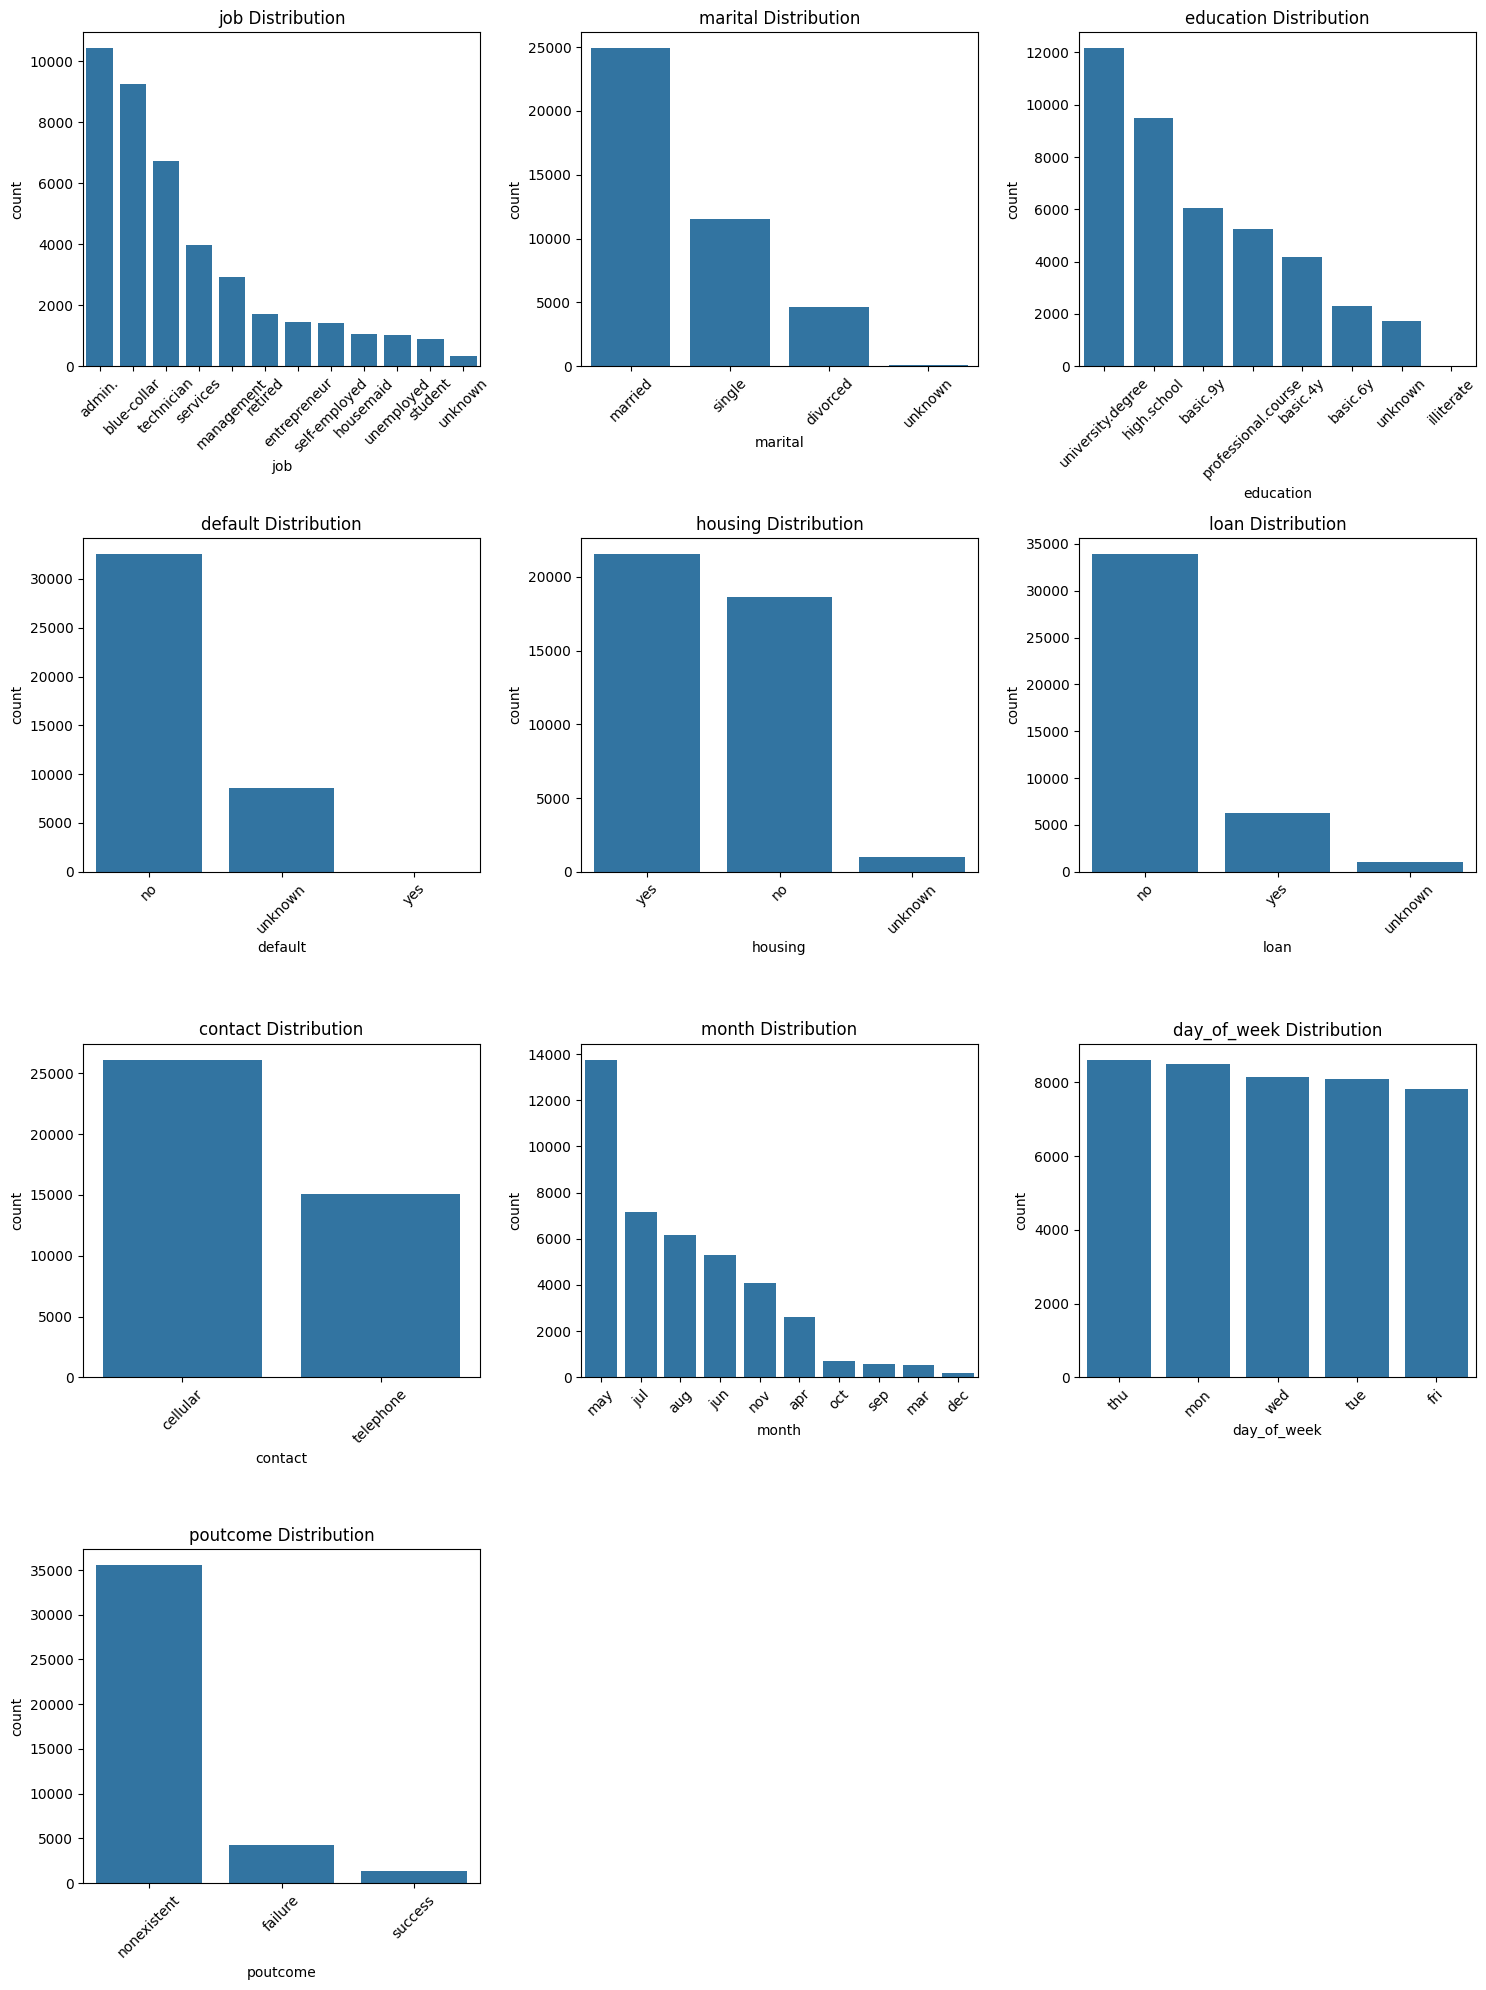

In [ ]:
# Bar chart for category data
cols = df_categorical.columns
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, col in enumerate(cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.tick_params(axis='x', rotation=45)

# Delete empty subplots if any
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

The bar chart above shows the distribution of data for categorical variables. Categorical variables provide an overview of the distribution of respondents across various aspects. For the job variable, the three occupations with the highest number of respondents are admin, blue collar, and technician. Meanwhile, for the marital variable, most respondents were married, while the number of respondents with an unknown status was very small. For the education variable, more than half of respondents had higher education, and only a handful were illiterate.

Furthermore, for variables related to financial conditions, the majority of data for the default variable was recorded similarly, with very little variation. The housing and loan variables indicate that most respondents did or did not have a home loan or other loan, but there were still approximately 990 data items with an unknown status. For the contact variable, communication was mostly conducted via cellular telephone, compared to telephone. For the time distribution, the month variable covers 12 full months, but the largest number was in May, while the day_of_week variable was relatively evenly distributed throughout the week.

Finally, for the outcome variable, related to previous campaign results, most respondents had no record of interactions or campaign history. This shows that ongoing campaigns tend to target new potential customers, not based on previous campaigns.


Relationship between job and Target (y):
y                     0         1
job                              
admin.         0.870333  0.129667
blue-collar    0.931042  0.068958
entrepreneur   0.914835  0.085165
housemaid      0.899906  0.100094
management     0.887787  0.112213
retired        0.747669  0.252331
self-employed  0.895144  0.104856
services       0.918537  0.081463
student        0.685714  0.314286
technician     0.891808  0.108192
unemployed     0.857988  0.142012
unknown        0.887879  0.112121
Chi-square p-value: 0.0000


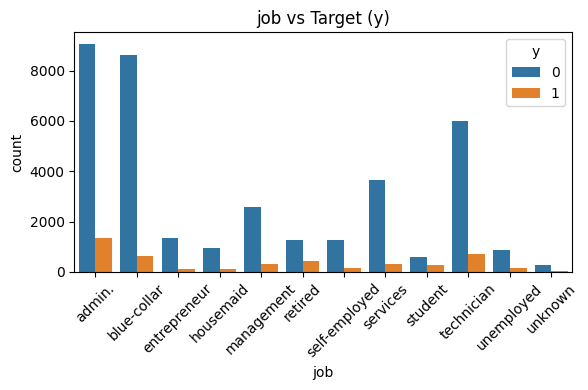


Relationship between marital and Target (y):
y                0         1
marital                     
divorced  0.896746  0.103254
married   0.898491  0.101509
single    0.859910  0.140090
unknown   0.850000  0.150000
Chi-square p-value: 0.0000


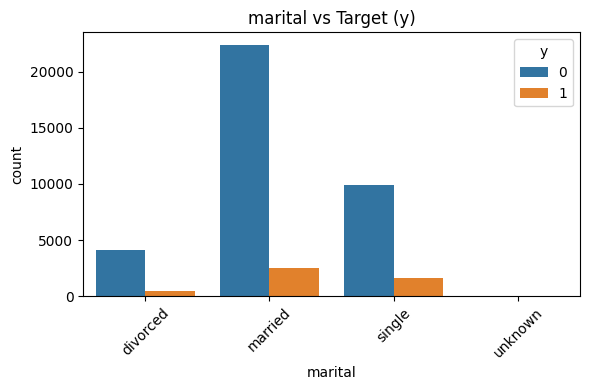


Relationship between education and Target (y):
y                           0         1
education                              
basic.4y             0.897485  0.102515
basic.6y             0.917940  0.082060
basic.9y             0.921741  0.078259
high.school          0.891588  0.108412
illiterate           0.777778  0.222222
professional.course  0.886598  0.113402
university.degree    0.862852  0.137148
unknown              0.854913  0.145087
Chi-square p-value: 0.0000


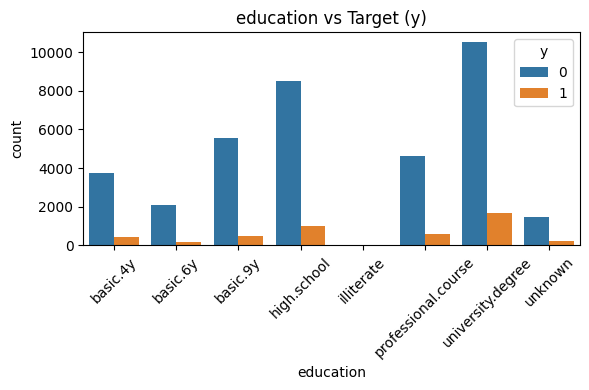


Relationship between default and Target (y):
y               0         1
default                    
no       0.871231  0.128769
unknown  0.948458  0.051542
yes      1.000000  0.000000
Chi-square p-value: 0.0000


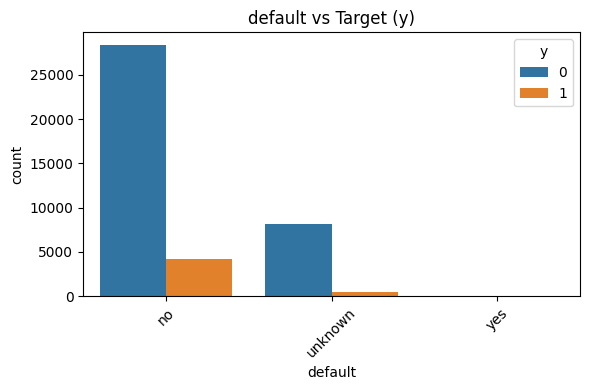


Relationship between housing and Target (y):
y               0         1
housing                    
no       0.891253  0.108747
unknown  0.891919  0.108081
yes      0.883799  0.116201
Chi-square p-value: 0.0560


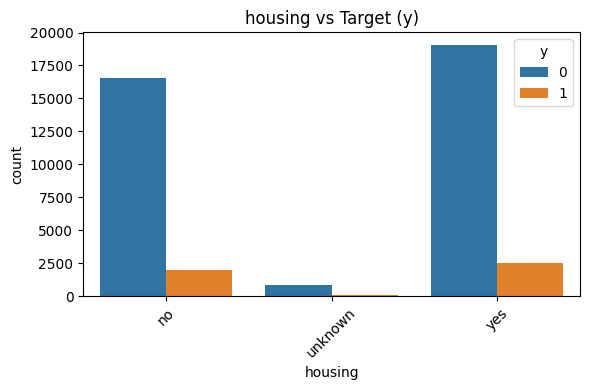


Relationship between loan and Target (y):
y               0         1
loan                       
no       0.886623  0.113377
unknown  0.891919  0.108081
yes      0.890668  0.109332
Chi-square p-value: 0.5845


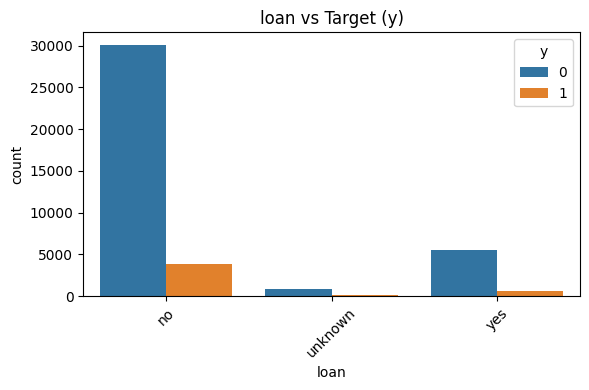


Relationship between contact and Target (y):
y                 0         1
contact                      
cellular   0.852665  0.147335
telephone  0.947662  0.052338
Chi-square p-value: 0.0000


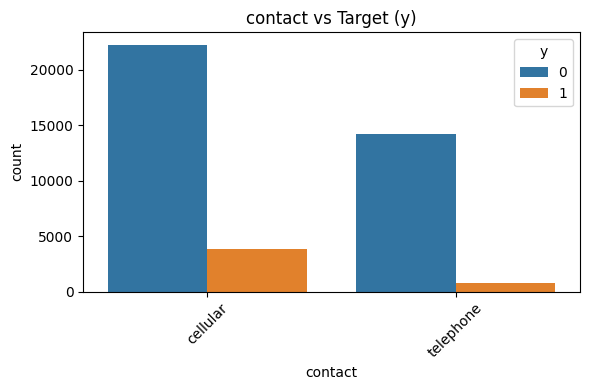


Relationship between month and Target (y):
y             0         1
month                    
apr    0.795135  0.204865
aug    0.893944  0.106056
dec    0.510989  0.489011
jul    0.909611  0.090389
jun    0.894885  0.105115
mar    0.494505  0.505495
may    0.935625  0.064375
nov    0.898926  0.101074
oct    0.560669  0.439331
sep    0.550877  0.449123
Chi-square p-value: 0.0000


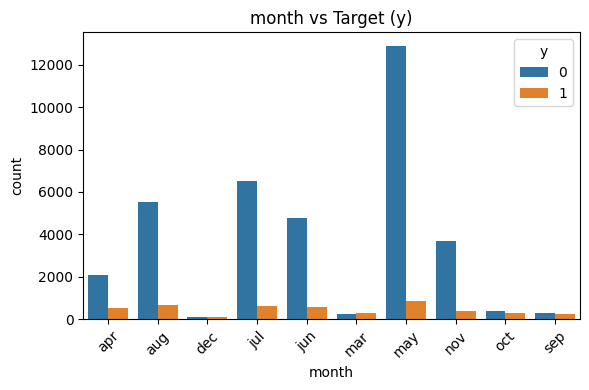


Relationship between day_of_week and Target (y):
y                   0         1
day_of_week                    
fri          0.891885  0.108115
mon          0.900552  0.099448
thu          0.878960  0.121040
tue          0.882142  0.117858
wed          0.883315  0.116685
Chi-square p-value: 0.0000


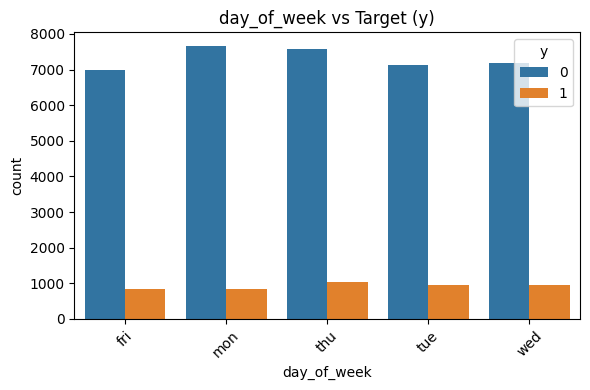


Relationship between poutcome and Target (y):
y                   0         1
poutcome                       
failure      0.857647  0.142353
nonexistent  0.911666  0.088334
success      0.349380  0.650620
Chi-square p-value: 0.0000


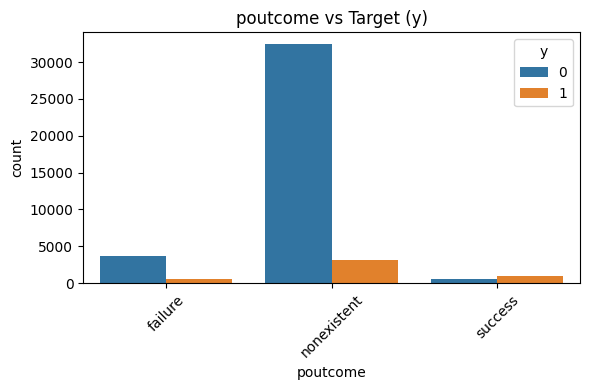

In [ ]:
# Crosstab to see the relationship between categorical variables and target variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\nRelationship between {col} and Target (y):")
    ct = pd.crosstab(df[col], df['y'], normalize='index')
    print(ct)

    # Chi-square test
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[col], df['y']))
    print(f"Chi-square p-value: {p:.4f}")

    # Visualization
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs Target (y)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

To examine the relationship between categorical variables and the target (y), the Chi-Square of Independence test was used. This test was chosen because it is suitable for categorical data, with the aim of determining whether the frequency distribution of categories in an independent variable is significantly related to the target variable. The resulting p-value serves as an indicator: if it is <0.05, there is a significant relationship, while if it is >0.05, there is no strong relationship between the variable and the target.

The analysis results show that most categorical variables have a significant relationship with the target p-value equal to 0.00, for example, job, marital status, education, contact, month, and outcome. Conversely, the housing variable, with a p-value equal to 0.0560, and the loan variable, with a p-value equal to 0.5845, do not show a significant relationship. Therefore, home loan ownership or personal loan ownership do not appear to significantly influence respondents' decisions to subscribe to bank products.

Furthermore, interesting patterns are observed in several variables. For example, in the job variable, respondents with student status (31.4%) and retired status (25.2%) have higher approval rates than those with other occupations. From a marital perspective, single and unacquainted respondents tended to have higher levels of positive responses than married or divorced respondents. Regarding education, respondents with illiterate education (22.2%) and university degrees (13.7%) had higher approval rates than those with basic education. The contact variable was also quite clear, with communication via cellular communication generating a higher proportion of positive responses (14.7%) than telephone (5.2%). Furthermore, the month variable showed significant variation, with March (50.5%) and December (48.9%) having significantly higher percentages of positive responses than other months. Finally, outcome was the most powerful variable, as respondents who had previously succeeded in the campaign achieved a 65% conversion rate, significantly higher than those in the failure or non-existent categories.